## Production Inflation

"Production Price Inflation" also known as "PPI" measures the change in production costs.  The data analysis should provide some insight for the most significant periods of change in PPI and how this change has an overall impact on inflation as whole.

This analyis will answer two questions:

* Which years experienced the most significant increases/decreases in PPI?
* How does the U.S. individual inflation compare to the global changes?

In [133]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# Create file path to access data
file_path = Path('Resources/global_dataset_of_inflation.csv')
data = pd.read_csv(file_path, encoding='utf-8', encoding_errors='ignore')

# Create dataframe for csv files
inflation_df = pd.DataFrame(data)

# Show DataFrame
inflation_df.head(3)

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,4.26,1.22,0.74,6.04,Annual average inflation,NaN,NaN,NaN,NaN,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,2.30,5.44,5.06,NaN,Annual average inflation,NaN,NaN,NaN,NaN,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,...,17.08,21.02,23.85,21.35,Annual average inflation,NaN,NaN,NaN,NaN,NaN


## Data cleaning 

In [134]:
# Identify the different inflation categories

categories = inflation_df['Series Name'].unique()
print(f"Categories: {categories}")

Categories: ['Headline Consumer Price Inflation' 'Energy Consumer Price Inflation'
 'Food Consumer Price Inflation' 'Official Core Consumer Price Inflation'
 'Producer Price Inflation']


In [135]:
# Identify the differnt column names for extraction purposees
columns = inflation_df.columns

print(columns)

Index(['Country Code', 'IMF Country Code', 'Country', 'Indicator Type',
       'Series Name', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'Note', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63'],
      dtype='object')


In [136]:
# Extract the information for production price index only
producer_inflation_data = inflation_df[inflation_df['Series Name'] == 'Producer Price Inflation']

# Create dataframe for the production price data 
producer_df = pd.DataFrame(producer_inflation_data)
producer_df.head(3)

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
670,AGO,614.0,Angola,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,17.57,23.15,29.80,27.34,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
671,ALB,914.0,Albania,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-0.80,-3.43,2.70,18.72,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
672,ARG,213.0,Argentina,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,58.31,42.51,59.09,62.44,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN


In [137]:
# Extract the information for the year range 1990 - 2022
drop_info = producer_df.iloc[:, 5:25]
copy_producer_df = producer_df.iloc[:, :5].join(producer_df.iloc[:, 25:59]).copy()
copy_producer_df

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1990,1991,1992,1993,1994,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Note
670,AGO,614.0,Angola,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,6.72,9.17,20.39,23.02,16.09,17.57,23.15,29.80,27.34,"Producer Price Index, All Commodities"
671,ALB,914.0,Albania,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.61,2.84,1.60,-0.80,-3.43,2.70,18.72,"Producer Price Index, All Commodities"
672,ARG,213.0,Argentina,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,26.01,NaN,NaN,16.26,52.22,58.31,42.51,59.09,62.44,"Producer Price Index, All Commodities"
673,ARM,911.0,Armenia,Inflation,Producer Price Inflation,NaN,NaN,800.00,764.44,3950.26,...,8.47,-0.77,1.51,2.16,0.08,0.63,2.98,9.87,3.54,"Producer Price Index, All Commodities"
674,AUS,193.0,Australia,Inflation,Producer Price Inflation,5.97,1.45,1.54,2.00,0.77,...,-3.47,-4.94,-1.43,8.49,5.21,1.01,-3.71,5.74,6.74,"Producer Price Index, All Commodities"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,VEN,299.0,"Venezuela, RB",Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,60.47,142.03,291.62,905.66,169201.78,NaN,NaN,NaN,NaN,"Producer Price Index, All Commodities"
779,VNM,582.0,Vietnam,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,3.26,-0.59,-0.61,NaN,NaN,NaN,NaN,NaN,NaN,"Producer Price Index, All Commodities"
780,XKX,967.0,Kosovo,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.63,2.66,-0.07,0.59,1.35,0.93,-0.58,4.92,NaN,"Producer Price Index, All Commodities"
781,ZAF,199.0,South Africa,Inflation,Producer Price Inflation,11.79,11.33,7.60,6.51,8.79,...,7.40,3.61,7.08,4.88,5.45,4.62,2.49,7.12,14.36,"Producer Price Index, All Commodities"


In [138]:
countries_count = len(producer_df['Country'].unique())
print(f"The total numbers: {countries_count}")

The total numbers: 113


In [139]:
rows_with_nan = producer_df[producer_df.isna().any(axis=1)]
pd.DataFrame(rows_with_nan)

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
670,AGO,614.0,Angola,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,17.57,23.15,29.80,27.34,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
671,ALB,914.0,Albania,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-0.80,-3.43,2.70,18.72,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
672,ARG,213.0,Argentina,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,58.31,42.51,59.09,62.44,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
673,ARM,911.0,Armenia,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,0.63,2.98,9.87,3.54,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
674,AUS,193.0,Australia,Inflation,Producer Price Inflation,4.35,4.92,4.81,8.64,15.29,...,1.01,-3.71,5.74,6.74,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,VEN,299.0,"Venezuela, RB",Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
779,VNM,582.0,Vietnam,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
780,XKX,967.0,Kosovo,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,0.93,-0.58,4.92,NaN,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
781,ZAF,199.0,South Africa,Inflation,Producer Price Inflation,NaN,5.00,6.35,12.44,18.58,...,4.62,2.49,7.12,14.36,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN


In [140]:
sum_stats_year = producer_df.describe()
sum_stats_year_df = pd.DataFrame(sum_stats_year)

sum_stats_year_df


,IMF Country Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2017,2018,2019,2020,2021,2022,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
count,113.00000,28.000000,27.000000,27.000000,27.000000,28.000000,31.000000,29.000000,29.000000,30.000000,...,104.000000,105.000000,102.000000,100.000000,100.000000,97.000000,0.0,0.0,0.0,0.0
mean,535.39823,6.707143,3.456667,9.556296,17.825556,21.129286,13.666129,11.889310,10.356897,8.564667,...,14.584038,1617.713810,3.256765,0.640600,12.873800,23.499588,NaN,NaN,NaN,NaN
std,302.89589,5.399031,6.670313,16.518790,21.518623,17.831269,17.500132,10.641768,12.019763,13.877726,...,88.509557,16511.787354,8.291322,11.259386,12.825199,20.414826,NaN,NaN,NaN,NaN
min,111.00000,-0.460000,-19.700000,-0.710000,2.390000,-35.940000,-5.070000,-1.990000,-22.020000,-23.800000,...,-4.570000,-1.770000,-9.480000,-31.430000,-1.780000,1.530000,NaN,NaN,NaN,NaN
25%,228.00000,3.555000,0.480000,4.440000,8.005000,14.957500,3.930000,5.100000,5.010000,1.977500,...,1.960000,2.180000,0.195000,-2.680000,6.117500,11.250000,NaN,NaN,NaN,NaN
50%,534.00000,5.735000,4.040000,5.170000,12.440000,19.405000,11.370000,8.910000,7.940000,7.665000,...,3.390000,3.950000,1.440000,-0.355000,9.540000,18.990000,NaN,NaN,NaN,NaN
75%,912.00000,7.942500,5.375000,8.435000,17.035000,25.462500,16.275000,16.510000,14.410000,9.572500,...,7.182500,6.180000,3.100000,2.985000,13.535000,26.570000,NaN,NaN,NaN,NaN
max,968.00000,25.120000,21.180000,89.840000,114.350000,79.020000,72.380000,50.570000,50.330000,53.160000,...,905.660000,169201.780000,58.310000,56.140000,69.600000,130.850000,NaN,NaN,NaN,NaN


In [141]:
countries = producer_df['Country']
print(countries)

670           Angola
671          Albania
672        Argentina
673          Armenia
674        Australia
           ...      
778    Venezuela, RB
779          Vietnam
780           Kosovo
781     South Africa
782           Zambia
Name: Country, Length: 113, dtype: object


In [142]:
year_range = producer_df.iloc[:, 25:58]
years = year_range.columns

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (113,) and arg 1 with shape (33,).

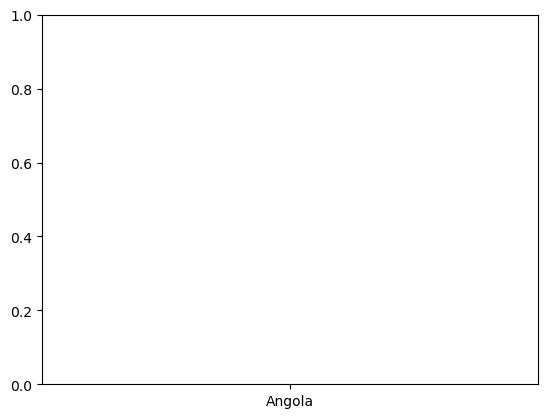

In [143]:
year_data = year_range.mean()
plt.bar(countries, year_data)

In [ ]:
global_averages = year_range.mean()
global_averages_df= pd.DataFrame(global_averages)
global_averages_df

,0
1990,199.566667
1991,31.080952
1992,33.358571
1993,418.019592
1994,211.513860
1995,39.084655
1996,18.529492
1997,27.149677
1998,6.683485
1999,12.675672


In [ ]:
usa_data = producer_df[producer_df['Country'] == 'United States']
usa_df = pd.DataFrame(usa_data)

In [ ]:
usa_df.loc[:, '1970']
columns_to_extract = usa_df.loc[:, '1990':'2022']

columns_to_extract

cleaned_usa_df = columns_to_extract.squeeze()

In [ ]:
cleaned_usa_df

1990    3.56
1991    0.22
1992    0.59
1993    1.46
1994    1.30
1995    3.58
1996    2.34
1997   -0.07
1998   -2.48
1999    0.84
2000    5.78
2001    1.11
2002   -2.29
2003    5.35
2004    6.18
2005    7.32
2006    4.67
2007    4.80
2008    9.81
2009   -8.84
2010    4.48
2011    3.87
2012    1.86
2013    1.36
2014    1.58
2015   -0.87
2016    0.42
2017    2.33
2018    2.90
2019    1.69
2020   -2.12
2021    8.95
2022    7.91
Name: 776, dtype: float64

## Plotting

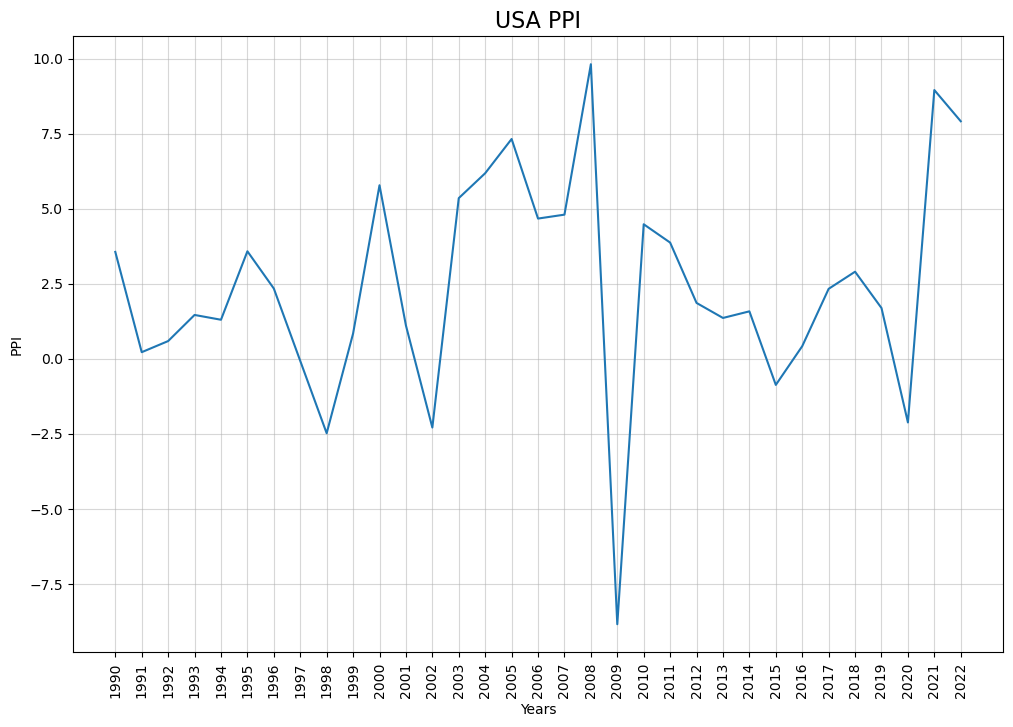

In [ ]:
# Configure Plot Size
plt.figure(figsize=(12,8))

#Plot Data
plt.plot(cleaned_usa_df)
plt.title('USA PPI', fontsize=16)
plt.xlabel('Years')
plt.ylabel('PPI')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.5)
plt.show()

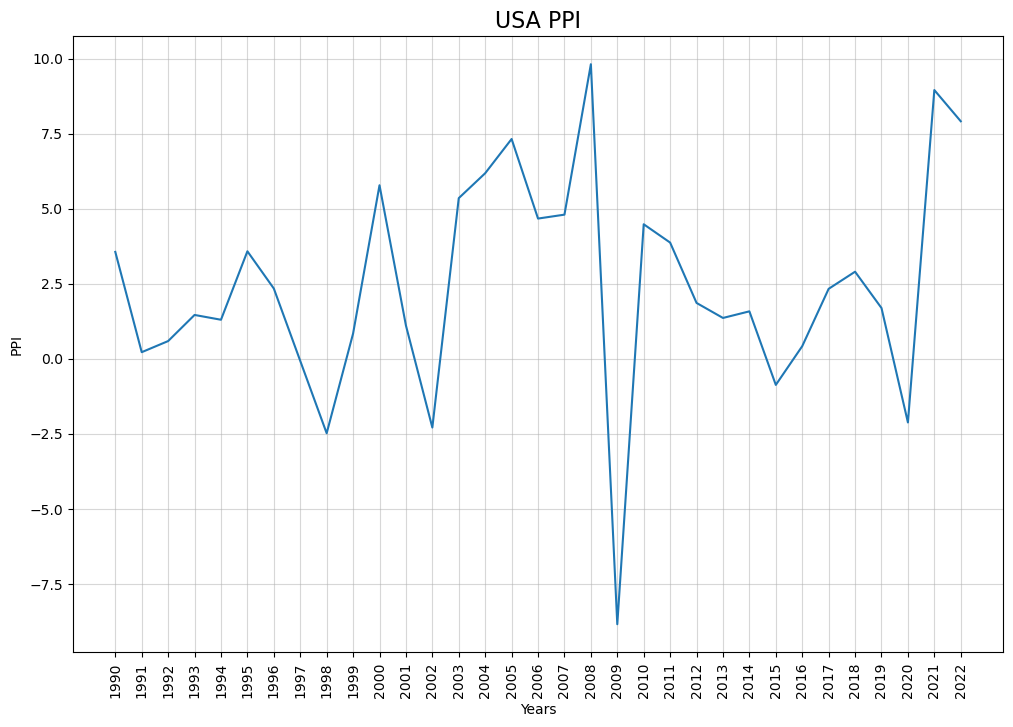

In [ ]:
# Configure Plot Size
plt.figure(figsize=(12,8))

#Plot Data
plt.plot(cleaned_usa_df)
plt.title('USA PPI', fontsize=16)
plt.xlabel('Years')
plt.ylabel('PPI')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.5)

plt.show()

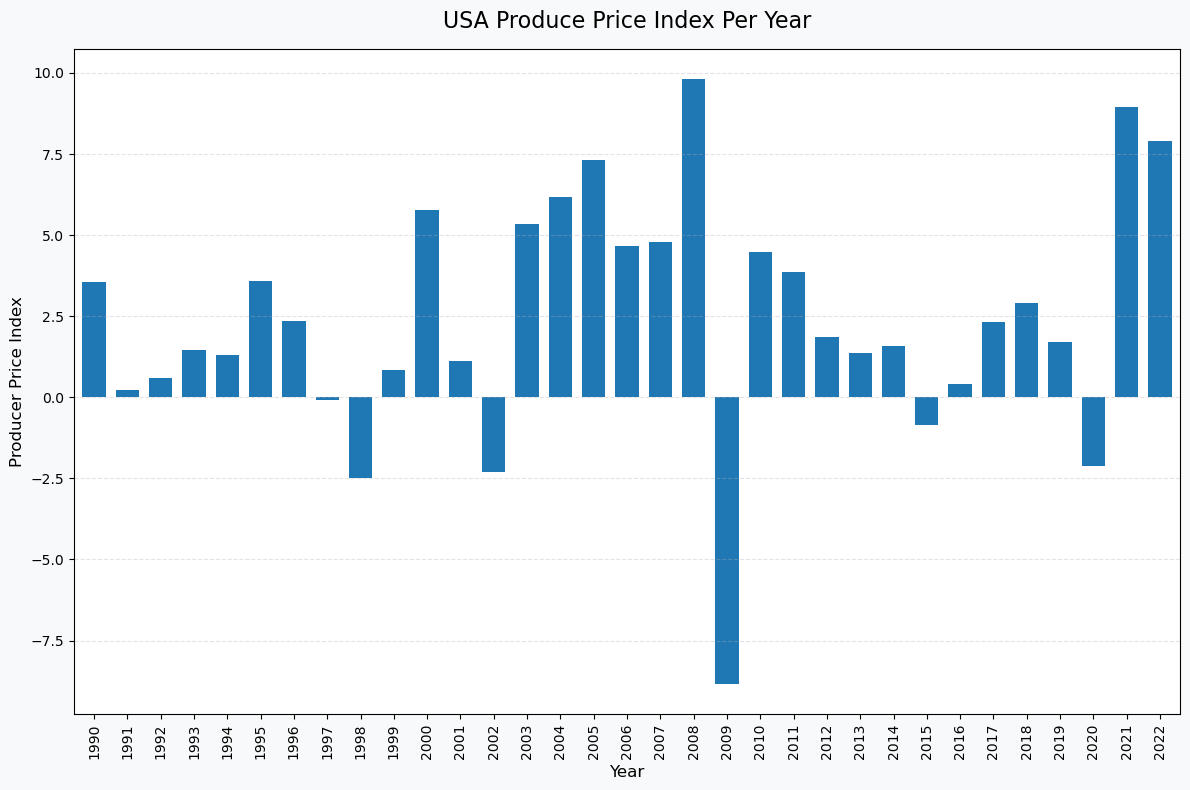

In [ ]:
plt.figure(figsize=(12,8))
cleaned_usa_df.plot(kind='bar', width=0.7)
plt.title('USA Produce Price Index Per Year', fontsize=16, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Producer Price Index', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.35, zorder=0)
plt.gcf().set_facecolor('#f8f9fa')
plt.show()

In [ ]:
new_global_avg = global_averages_df.reset_index()

In [ ]:
year = new_global_avg['index']
ppi = new_global_avg[0]

In [ ]:
cleaned_usa_df.head()

1990    3.56
1991    0.22
1992    0.59
1993    1.46
1994    1.30
Name: 776, dtype: float64

In [ ]:
cleaned_usa_df.index

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

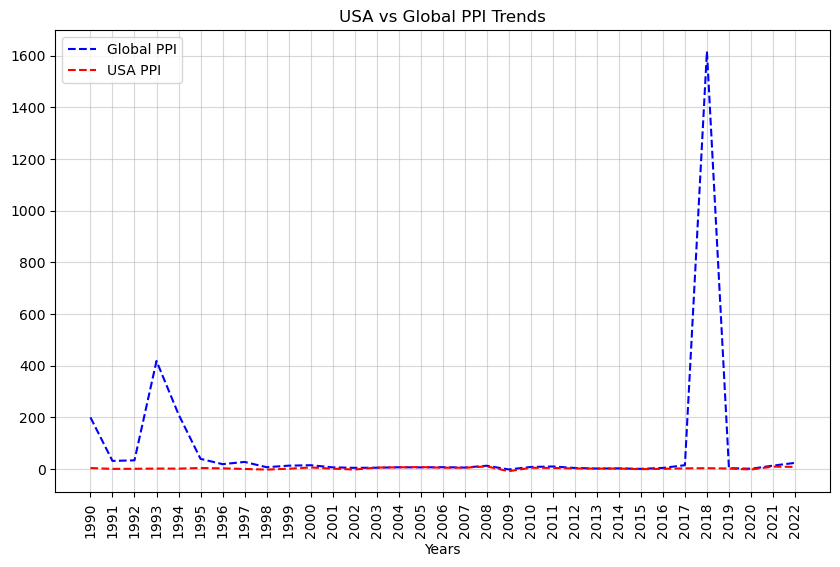

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(global_averages, "b--", label="Global PPI")
plt.title('USA vs Global PPI Trends')
plt.xlabel('Years')
plt.grid(True, alpha=0.5)
plt.xticks(rotation=90)
plt.plot(cleaned_usa_df, "r--", label="USA PPI")
plt.legend(loc="upper left")
plt.show()

In [ ]:

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
plt.figure(figsize=(10, 6))
plt.grid(True, alpha=0.5)
plt.xticks(rotation=90)
ax.plot([1, 2, 3])
ax.plot([5, 6, 7])
ax.legend(['First line', 'Second line'])
plt.legend()
# red dashes, blue squares and green triangles
plt.plot(global_averages_df, 'r--', label='Line 1', cleaned_usa_df**2, 'bs', label='Line2')
plt.show()

SyntaxError: positional argument follows keyword argument (1370033901.py, line 11)

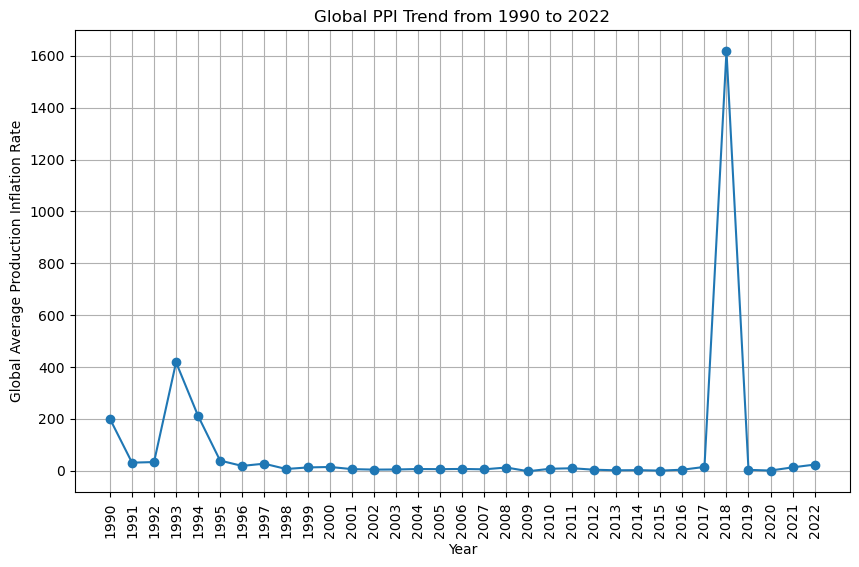

In [ ]:
# Plotting the line graph

plt.figure(figsize=(10, 6))
plt.plot(global_averages_df, marker='o')  # Adjust `iloc[0]` based on your data row selection
plt.title("Global PPI Trend from 1990 to 2022")
plt.xlabel("Year")
plt.ylabel("Global Average Production Inflation Rate")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(producer_df_copy.info())

NameError: name 'producer_df_copy' is not defined

In [ ]:
copy_producer_df.columns

Index(['Country Code', 'IMF Country Code', 'Country', 'Indicator Type',
       'Series Name', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'Note'],
      dtype='object')

In [ ]:
missing_data = []
complete_data = []

for index, row in copy_producer_df.iterrows():
    if row.isnull().any():  # Check if the row has missing values
        missing_cols = row[row.isnull()].index.tolist()  # Get columns with missing values
        country = row['Country']

        #append a dictionary
        missing_data.append({
            'country': country, 
            'missing_columns': missing_cols
            })

    else:

        complete_data.append({
            'country': country,
            'missing_columns': missing_cols
        })

missing_df = pd.DataFrame(missing_data)
complete_df = pd.DataFrame(complete_data)

result_df = missing_df.join(complete_df, how='outer', lsuffix='_missing', rsuffix='_complete')

result_df

,country_missing,missing_columns_missing,country_complete,missing_columns_complete
0,Angola,"[1990, 1991, 1992, 1993, 1994, 1995, 1996, 199...",Armenia,"[1990, 1991]"
1,Albania,"[1990, 1991, 1992, 1993, 1994, 1995, 1996, 199...",Armenia,"[1990, 1991]"
2,Argentina,"[1990, 1991, 1992, 1993, 1994, 2015, 2016]",Azerbaijan,"[1990, 1991, 1992, 1993, 1994, 1995, 1996, 199..."
3,Armenia,"[1990, 1991]",Bangladesh,"[1990, 1991, 1992, 1993, 1994, 1995, 1996, 199..."
4,Azerbaijan,"[1990, 1991, 1992, 1993, 1994, 1995, 1996, 199...",Central African Republic,"[1992, 1993, 1994, 1995, 1996, 1997, 2006, 200..."
...,...,...,...,...
74,Uzbekistan,"[1990, 1991, 1992, 1993, 1994, 1995, 1996, 199...",NaN,NaN
75,"Venezuela, RB","[1990, 1991, 1992, 1993, 1994, 1995, 1996, 199...",NaN,NaN
76,Vietnam,"[1990, 1991, 1992, 1993, 1994, 1995, 1996, 199...",NaN,NaN
77,Kosovo,"[1990, 1991, 1992, 1993, 1994, 1995, 1996, 199...",NaN,NaN


## Bonus Section: Grouping by Continent 

In [ ]:
import pycountry_convert as pc
import pandas as pd

In [ ]:
df = pd.read_csv('Resources/Global_Dataset_of_Inflation.csv', encoding='ISO-8859-1')

In [ ]:
# Function to map country to continent
def get_continent(country_name):
    try:
        # Convert country name to alpha-2 code
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        # Convert alpha-2 code to continent code
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        # Map continent codes to continent names
        continents = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'SA': 'South America',
            'OC': 'Oceania',
            'AN': 'Antarctica'
        }
        return continents[continent_code]
    except KeyError:
        return 'Unknown'

# Add a 'Continent' column to your DataFrame
df['Continent'] = df['Country'].apply(get_continent)

# Sort by continent
df.sort_values(by='Continent', inplace=True)

# Save the organized DataFrame to a new CSV
# df.to_csv('organized_by_continent.csv', index=False)

df.head()


,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Continent
782,ZMB,754.0,Zambia,Inflation,Producer Price Inflation,14.29,0.0,4.17,12.0,10.71,...,NaN,NaN,NaN,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN,Africa
528,SWZ,734.0,Swaziland,Inflation,Food Consumer Price Inflation,2.10,2.3,1.50,15.6,19.90,...,NaN,NaN,NaN,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN,Africa
529,SYC,718.0,Seychelles,Inflation,Food Consumer Price Inflation,18.40,18.4,28.60,23.6,22.10,...,10.26,NaN,NaN,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN,Africa
670,AGO,614.0,Angola,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,23.15,29.80,27.34,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN,Africa
531,TCD,628.0,Chad,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,9.44,-1.63,5.93,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN,Africa


In [ ]:
# Identifying column index for filtering purposes
what_is_the_loc = df.columns.get_loc('2022')

print(what_is_the_loc)

57


In [ ]:
# Extract the years 1990 - 2022

columns_to_drop = list(df.iloc[:, 5:25]) + list(df.iloc[:, 58:64])

continent_df = df.drop(columns= columns_to_drop).copy()

continent_df.head()

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1990,1991,1992,1993,1994,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Continent
782,ZMB,754.0,Zambia,Inflation,Producer Price Inflation,117.04,93.03,131.71,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
528,SWZ,734.0,Swaziland,Inflation,Food Consumer Price Inflation,16.50,13.30,11.70,13.4,19.60,...,6.35,4.15,15.07,7.10,1.95,2.15,NaN,NaN,NaN,Africa
529,SYC,718.0,Seychelles,Inflation,Food Consumer Price Inflation,4.80,2.50,1.80,2.8,-7.10,...,0.51,0.48,0.04,0.34,-0.05,-0.01,10.26,NaN,NaN,Africa
670,AGO,614.0,Angola,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,6.72,9.17,20.39,23.02,16.09,17.57,23.15,29.80,27.34,Africa
531,TCD,628.0,Chad,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,40.67,...,2.52,2.47,-2.71,-3.72,-1.86,-5.39,9.44,-1.63,5.93,Africa


In [ ]:
country_unknown = continent_df[continent_df['Continent'] == 'Unknown']['Country'].tolist()

print(country_unknown)

['Kosovo', 'Korea, Rep.', 'Bahamas, The', 'Taiwan, China', 'Gambia, The', 'Congo, Rep.', 'Egypt, Arab Rep.', 'Curacao', 'Moldova, Rep.', 'Congo, Dem. Rep.', 'Tanzania, United Rep.', 'Venezuela, RB', 'Micronesia, Fed. Sts.', 'Hong Kong SAR', 'Iran, Islamic Rep.', 'Egypt, Arab Rep.', 'Egypt, Arab Rep.', 'Gambia, The', 'Iran, Islamic Rep.', 'Korea, Rep.', 'Lao PDR', 'Yemen, Rep.', 'Venezuela, RB', 'St. Vincent and the Grenadines', 'Macedonia, FYR', 'São Tomé and Principe', 'Hong Kong SAR, China', 'São Tomé and Principe', 'Venezuela, RB', 'Bahamas, The', 'Macedonia, FYR', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Curacao', 'Lao PDR', 'Korea, Rep.', 'Egypt, Arab Rep.', 'Gambia, The', 'Iran, Islamic Rep.', 'St. Vincent and the Grenadines', 'Iran, Islamic Rep.', 'Curacao', 'Congo, Rep.', 'Iran, Islamic Rep.', 'Hong Kong SAR, China', 'Gambia, The', 'Korea, Rep.', 'Lao PDR', 'Macao SAR, China', 'Egypt, Arab Rep.', 'Macedonia, FYR', 'Congo, Rep.', 'West Bank and Gaza', 'Kosovo', 'Venezuela, RB', 'Taiw

In [ ]:
rename_data = {
    'Country': ['Kosovo', 'Korea, Rep.', 'Taiwan, China', 'Tanzania, United Rep.', 'Moldova, Rep.', 'Venezuela, RB', 'Iran, Islamic Rep.', 'Congo, Rep.', 'Egypt, Arab Rep.', 'Hong Kong SAR, China', 'Gambia, The'],
    'Continent': ['Europe', 'Asia', 'Asia', 'Africa', 'Europe', 'South America', 'Asia', 'Africa', 'Africa', 'Asia', 'Africa']
}

pd.DataFrame(data)

countries_rename = {
  'Kosovo': 'Europe',
  'Korea, Rep.': 'Asia',
  'Taiwan, China': 'Asia',
  'Tanzania, United Rep.': 'Africa',
  'Moldova, Rep.': 'Europe',
  'Venezuela, RB': 'South America',
  'Iran, Islamic Rep.': 'Asia',
  'Congo, Rep.': 'Africa',
  'Egypt, Arab Rep.': 'Africa',
  'Hong Kong SAR, China': 'Asia',
  'Gambia, The': 'Africa'
}

# Update 'Continent' column for rows where the continent is 'Unknown'
for index, row in continent_df.iterrows():
    if row['Continent'] == 'Unknown':  # Check if continent is 'Unknown'
        correct_continent = countries_rename.get(row['Country'])
        if correct_continent:  # Update only if mapping exists
            continent_df.at[index, 'Continent'] = correct_continent

producer_continent_df = continent_df[continent_df['Series Name'] == 'Producer Price Inflation']
producer_continent_df['Continent'].unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

In [ ]:
africa = producer_continent_df.loc[producer_continent_df['Continent'] == 'Africa']
africa_years = africa.iloc[:, 6:38].mean()

europe = producer_continent_df.loc[producer_continent_df['Continent'] == 'Europe']
europe_years = europe.iloc[:, 6:38].mean()

asia = producer_continent_df.loc[producer_continent_df['Continent'] == 'Asia']
asia_years = asia.iloc[:, 6:38].mean()

oceania = producer_continent_df.loc[producer_continent_df['Continent'] == 'Oceania']
oceania_years = oceania.iloc[:, 6:38].mean()

s_america = producer_continent_df.loc[producer_continent_df['Continent'] == 'South America']
s_america_years = s_america.iloc[:, 6:38].mean()

n_america = producer_continent_df.loc[producer_continent_df['Continent'] == 'North America']
n_america_years = n_america.iloc[:, 6:38].mean()

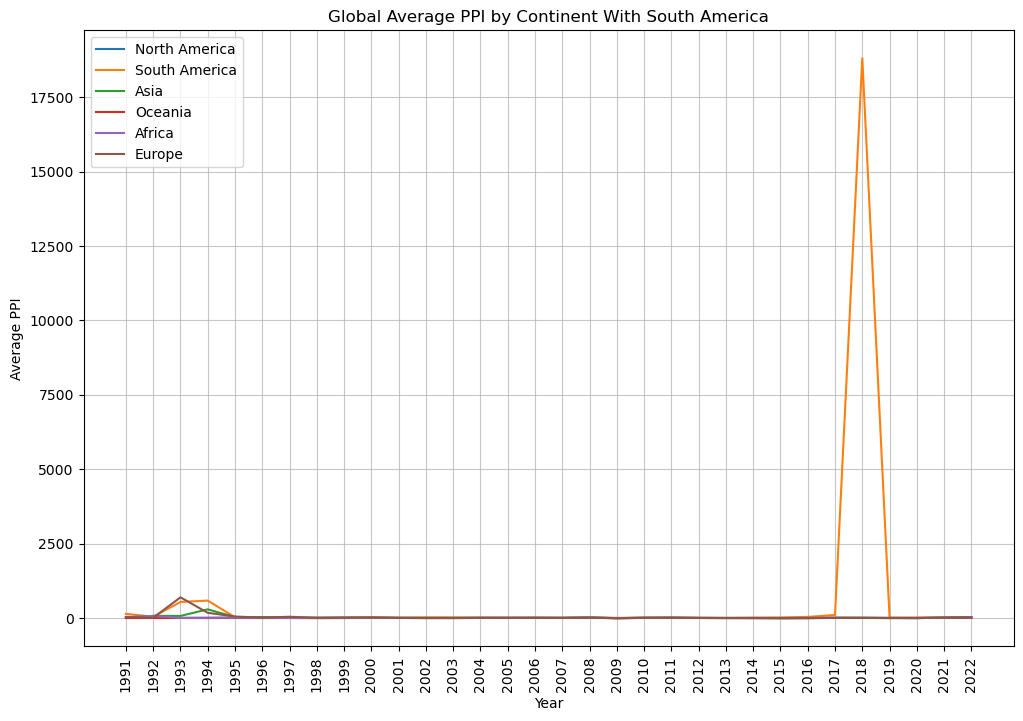

In [ ]:
#Set figure size
plt.figure(figsize=(12, 8))

# Plot average ppi for each continent 
plt.plot(n_america_years, label="North America")
plt.plot(s_america_years, label = "South America")
plt.plot(asia_years, label = "Asia")
plt.plot(oceania_years, label='Oceania')
plt.plot(africa_years, label='Africa')
plt.plot(europe_years, label='Europe')

# Stylize plot for readability
plt.title('Global Average PPI by Continent With South America') 
plt.xlabel('Year')
plt.ylabel('Average PPI')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.7)

plt.legend()


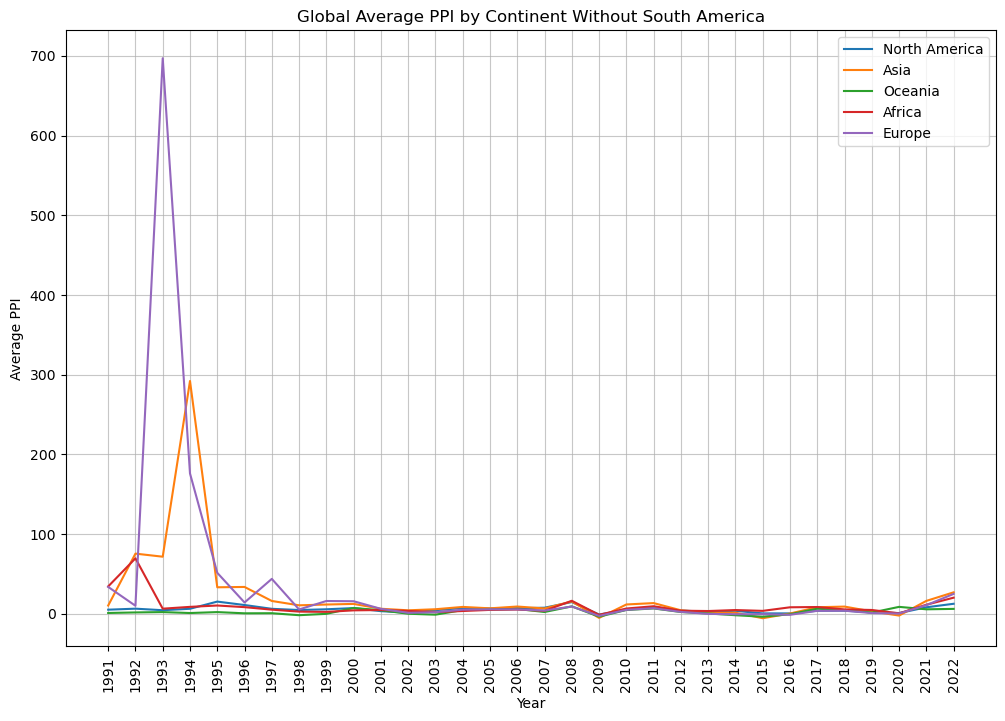

In [ ]:
#Set figure size
plt.figure(figsize=(12, 8))

# Plot average ppi for each continent 
plt.plot(n_america_years, label="North America")
plt.plot(asia_years, label = "Asia")
plt.plot(oceania_years, label='Oceania')
plt.plot(africa_years, label='Africa')
plt.plot(europe_years, label='Europe')

# Stylize plot for readability
plt.title('Global Average PPI by Continent Without South America') 
plt.xlabel('Year')
plt.ylabel('Average PPI')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.7)

plt.legend()
